In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style()

In [7]:
# Dónde estoy ejecutando esta notebook?
import os # operating system
os.getcwd() # get current working directory

'C:\\Users\\aulafor\\Desktop\\b'

In [5]:
# dataset guardado en la librería. Son ligeramente diferentes
# df = sns.load_dataset("titanic")
# Ruta relativa: desde aquí (getcwd), un nivel superior
df = pd.read_csv("../b/titanic_data.csv")

In [3]:
pip install jupyter_contrib_nbextensions


  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465829 sha256=a56238667f658237f76c7b89b40b1ef03db25e04f4b453ed946212880407cc9a
  Stored in directory: c:\users\aulafor\appdata\local\pip\cache\wheels\e3\3a\b3\a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963399 sha256=78fc15582c568adc21dd1649d7a8d21a845e850fe4cfc6d2949be40ffb6a2730
  Stored in directory: c:\users\aulafor\appdata\local\pip\cache\wheels\4d\ba\f4\b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515

In [6]:
df

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Artagaveytia, Mr. Ramon",1,male,71.0,0,0,PC 17609,49.5042,NaN,C,0
1,"Astor, Col. John Jacob",1,male,47.0,1,0,PC 17757,227.5250,C62 C64,C,0
2,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
3,"Aubart, Mme. Leontine Pauline",1,female,24.0,0,0,PC 17477,69.3000,B35,C,1
4,"Baxter, Mr. Quigg Edmond",1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,"Wiseman, Mr. Phillippe",3,male,NaN,0,0,A/4. 34244,7.2500,NaN,S,0
1305,"Wittevrongel, Mr. Camille",3,male,36.0,0,0,345771,9.5000,NaN,S,0
1306,"Zimmerman, Mr. Leo",3,male,29.0,0,0,315082,7.8750,NaN,S,0
1307,"Icard, Miss. Amelie",1,female,38.0,0,0,113572,80.0000,B28,S,1


In [50]:
df.Survived.value_counts()

0.0    784
1.0    450
Name: Survived, dtype: int64

In [51]:
missing_frac = (df.isna().sum()*100/df.shape[0]).round(2)
missing_frac

Name         5.73
Pclass       5.73
Sex          5.73
Age         23.83
Sibsp        5.73
Parch        5.73
Ticket       5.73
Fare         5.81
Cabin       78.15
Embarked     5.73
Survived     5.73
dtype: float64

Index(['Cabin'], dtype='object')

In [52]:
cols_to_drop = df.columns[missing_frac>25]

In [53]:
# nos cargamos la variable que tiene demasiados datos faltantes
df.drop(cols_to_drop, axis=1, inplace=True)

In [54]:
df.head()

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
Artagaveytia,Mr. Ramon,1.0,male,71.0,0.0,0.0,PC 17609,49.5042,C,0.0
Astor,Col. John Jacob,1.0,male,47.0,1.0,0.0,PC 17757,227.5250,C,0.0
Astor,Mrs. John Jacob (Madeleine Talmadge Force),1.0,female,18.0,1.0,0.0,PC 17757,227.5250,C,1.0
Aubart,Mme. Leontine Pauline,1.0,female,24.0,0.0,0.0,PC 17477,69.3000,C,1.0
Baxter,Mr. Quigg Edmond,1.0,male,24.0,0.0,1.0,PC 17558,247.5208,C,0.0


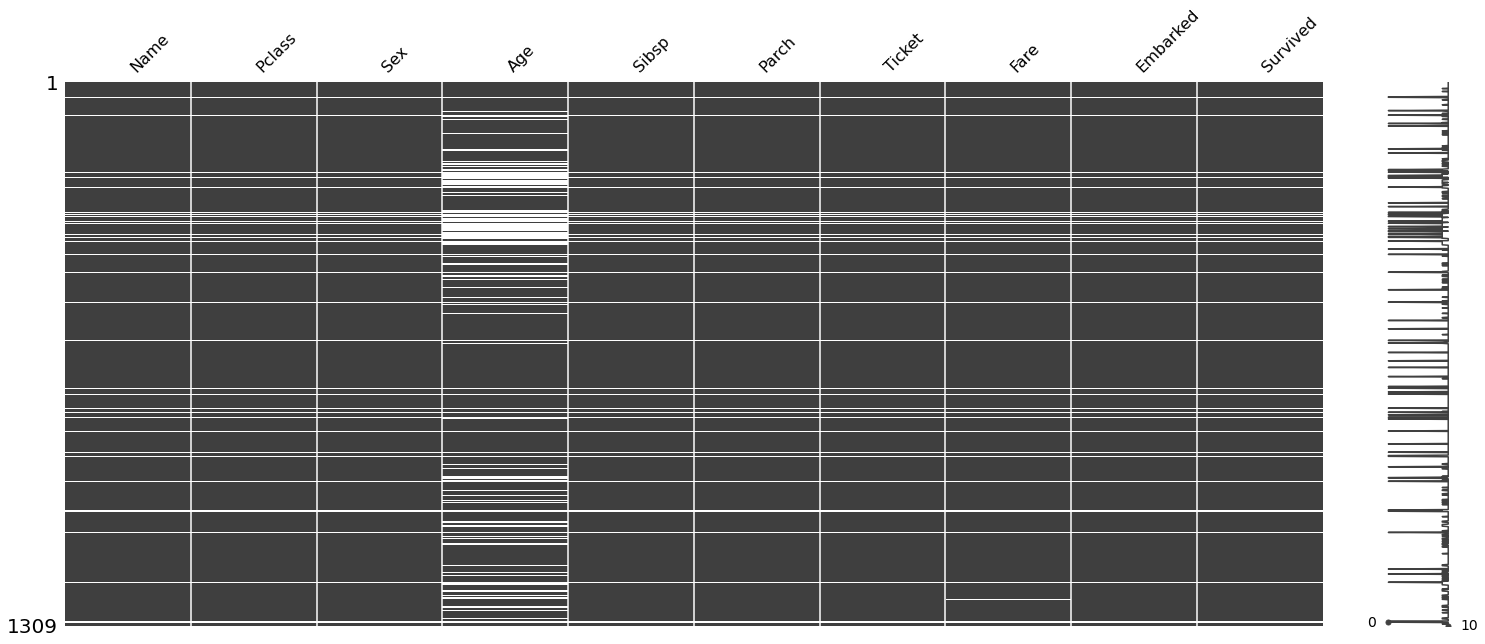

In [45]:
msno.matrix(df)

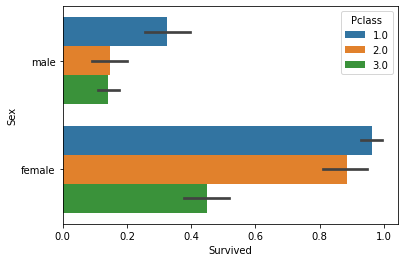

In [59]:
sns.barplot(x = "Survived",y = "Sex", hue ="Pclass", data=df) 

C:\Users\aulafor\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\aulafor\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


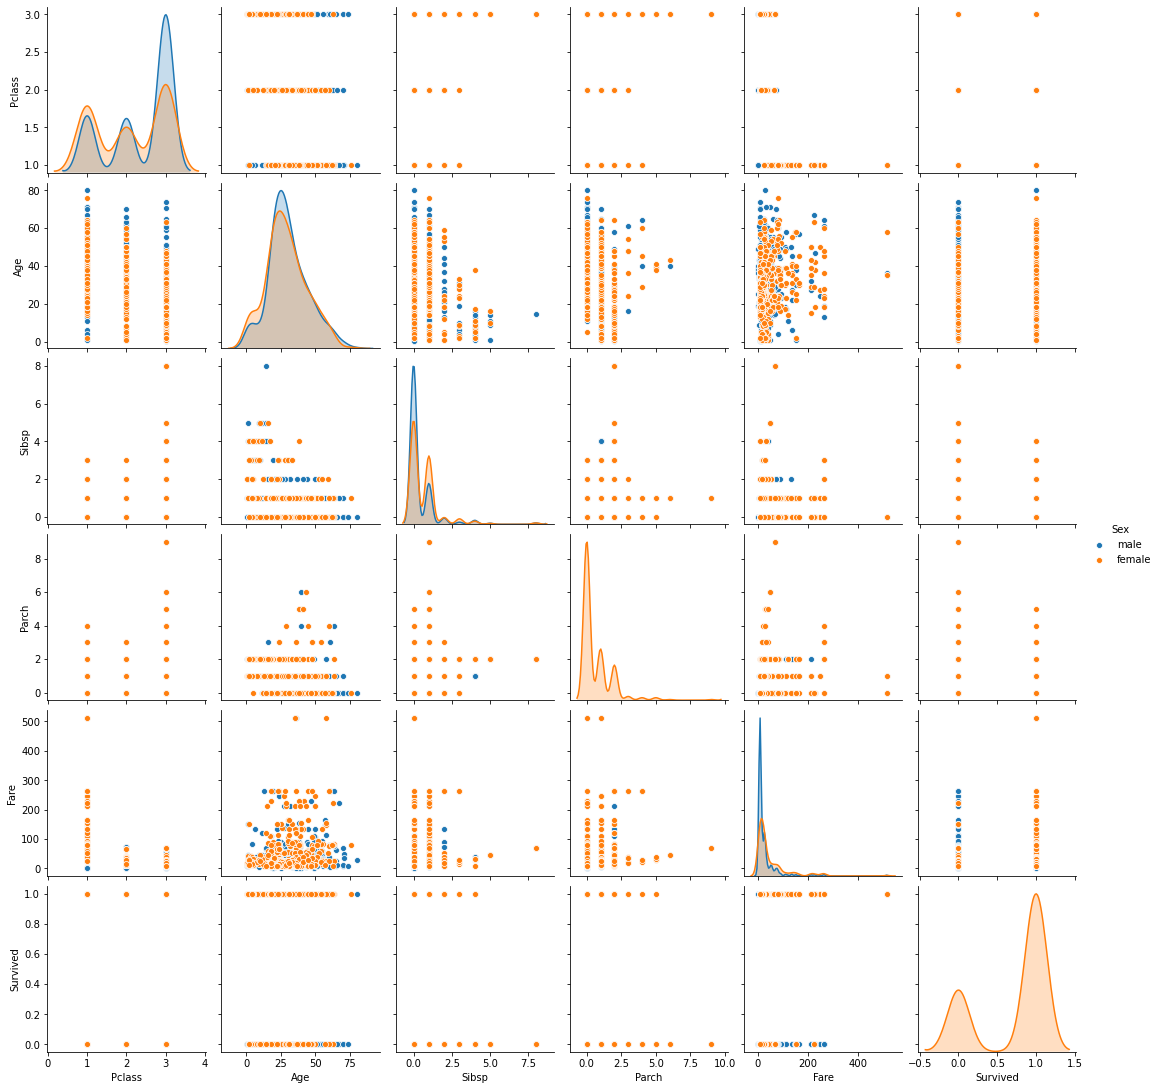

In [62]:
sns.pairplot(df,hue='Sex')

In [60]:
import pandas_profiling as pdprof

In [61]:
profile = pdprof.ProfileReport(df)
profile

In [63]:
df[df.Fare>400]

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
Cardeza,Mr. Thomas Drake Martinez,1.0,male,36.0,0.0,1.0,PC 17755,512.3292,C,1.0
Cardeza,Mrs. James Warburton Martinez (Charlotte Ward...,1.0,female,58.0,0.0,1.0,PC 17755,512.3292,C,1.0
Lesurer,Mr. Gustave J,1.0,male,35.0,0.0,0.0,PC 17755,512.3292,C,1.0
Ward,Miss. Anna,1.0,female,35.0,0.0,0.0,PC 17755,512.3292,C,1.0
